仿射变换
===


2D图像常见的坐标变换如下图所示：
![images](Images/01/09/05_001.png)

仿射变换利用$3 \times 3$的矩阵来进行图像变换。变换的方式有平行移动、放大缩小、旋转、倾斜等。
![images](Images/01/09/05_002.png)

原图像记为$(x,y)$，变换后的图像记为$(x',y')$。则没有平移或者平移量为0的所有仿射变换可以用如下变换矩阵来描述

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix} = \begin{bmatrix}
a&b \\
c&d
\end{bmatrix} \begin{bmatrix}
x \\
y
\end{bmatrix}
$$

不同变换对应的𝑎,𝑏,𝑐,𝑑约束不同，排除了平移变换的所有仿射变换为线性变换。其特点是原点位置不变，多次线性变换的结果仍是线性变换。为了涵盖平移，引入齐次坐标，在原有2维坐标的基础上，增广1个维度，如下所示

$$
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix} = \begin{bmatrix}
a&b&tx \\
c&d&ty \\
0&0&1
\end{bmatrix} \begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

所以，仿射变换的变换矩阵统一用$\begin{bmatrix}
a&b&tx \\
c&d&ty \\
0&0&1
\end{bmatrix}$来描述，不同基础变换的a,b,c,d,tx,ty约束不同
![images](Images/01/09/05_003.png)

但是在实际操作的过程中，如果一个一个地计算原图像的像素的话，处理后的像素可能没有在原图像中有对应的坐标。因此，我们有必要对处理后的图像中各个像素进行仿射变换逆变换，取得变换后图像中的像素在原图像中的坐标。仿射变换的逆变换如下：

$$
\begin{bmatrix}
x \\
y
\end{bmatrix} = \frac{1}{ad-bc}\begin{bmatrix}
d&-b \\
-c&a
\end{bmatrix} \begin{bmatrix}
x' \\
y'
\end{bmatrix}-\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}
$$

对于上式，我们需要解释一下。

$\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}$是针对平移操作，$t_x$就是在x轴上往右平移的量，$t_y$就是在y轴上往下平移的量

$
\begin{bmatrix}
a&b \\
c&d
\end{bmatrix}
$是针对变形操作，b和c是针对旋转和斜向拉伸的，a和d是针对放大缩小的。a是在x轴上放大的倍数，b是在y轴上放大的倍数。如果仅仅是平移，那么a=1,d=1,b=0,c=0

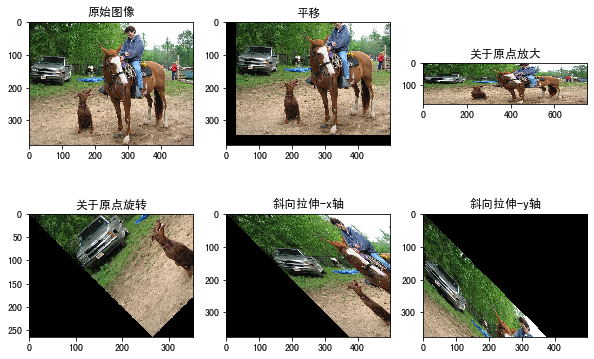

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
image = cv2.imread("Images/01/09/02.jpg", 1)

def affine(_img, parameter):
    a,b,c,d,tx,ty = parameter
    H,W,C = _img.shape
    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = _img

	# get new image shape
    H_new = np.round(H * d).astype(np.int)
    W_new = np.round(W * a).astype(np.int)
    out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)

	# get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

	# get position of original image by affine
    adbc = a * d - b * c
    x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1
    
    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

	# assgin pixcel to new image
    out[y_new, x_new] = img[y, x]
    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)
    return out

def myath(img):
    H,W,C = img.shapes
    paramters = np.array([[1,0,30],[0,1,30],[0,0,1]], dtype=np.unit8)
    

plt.figure(figsize=(10,10), facecolor='w')

plt.subplot(3, 3, 1)
plt.title(u"原始图像")
show_img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(3, 3, 2)
plt.title(u"平移")
show_img2 = cv2.cvtColor(affine(image, parameter=(1,0,0,1,30,-30)), cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

plt.subplot(3, 3, 3)
plt.title(u"关于原点放大")
show_img2 = cv2.cvtColor(affine(image, parameter=(1.5,0,0,0.5,0,0)), cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

plt.subplot(3, 3, 4)
plt.title(u"关于原点旋转")
show_img2 = cv2.cvtColor(affine(image, parameter=(math.cos(math.pi / 4),math.sin(math.pi / 4),-math.sin(math.pi / 4),math.cos(math.pi / 4),0,0)), cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

plt.subplot(3, 3, 5)
plt.title(u"斜向拉伸-x轴")
show_img2 = cv2.cvtColor(affine(image, parameter=(1,math.tan(math.pi / 4),0,1,0,0)), cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

plt.subplot(3, 3, 6)
plt.title(u"斜向拉伸-y轴")
show_img2 = cv2.cvtColor(affine(image, parameter=(1,0,math.tan(math.pi / 4),1,0,0)), cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)